# Importing The libraries used


In [2]:
import speech_recognition as sr
import pyaudio
import wave
import os
import librosa
from tqdm import tqdm 
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier
from scipy import signal
from IPython.display import Audio
import seaborn as sns
from sklearn.metrics import precision_recall_curve, average_precision_score



# 1.1 Speech recongintion : Loading the audio dataset in Variable

In [3]:

audio_path='input/ourTest/'
labels=os.listdir(audio_path)

all_wave=[]
all_label=[]

Rec=sr.Recognizer()
text_array=[]
#load the File of dataset with path 
df = pd.read_csv('input/TRAIN.csv')
df.shape

df.head(50)
fileNames=df["Filename"]
audioClass=df["Class"]





## 1.2 Convert The audio to audio data to can recongize it 

In [4]:
def create_testing_data():
    path =os.path.join(audio_path)
    for wav in tqdm(os.listdir(path)):
        
        try:
            samples=wave.open(audio_path+'/'+wav,"rb")
            sample_rate =samples.getframerate()
            audio_ex = sr.AudioFile(audio_path+wav)
            type(audio_ex)
            all_wave.append(audio_ex)
            #all_label.append(label)
            samples.close()
        except Exception as e:
            print(e)
            pass

create_testing_data()




100%|██████████| 99/99 [00:00<00:00, 12408.44it/s]


# 1.3 Checking The Type of variable

In [5]:
print(all_wave[0:10])

[<speech_recognition.AudioFile object at 0x000001F3AA6D63D0>, <speech_recognition.AudioFile object at 0x000001F3AACD6D00>, <speech_recognition.AudioFile object at 0x000001F3AA6FDB80>, <speech_recognition.AudioFile object at 0x000001F3AA7E9F70>, <speech_recognition.AudioFile object at 0x000001F3AA6FD280>, <speech_recognition.AudioFile object at 0x000001F3AA6FD670>, <speech_recognition.AudioFile object at 0x000001F3AA6FD4C0>, <speech_recognition.AudioFile object at 0x000001F3AA6D6850>, <speech_recognition.AudioFile object at 0x000001F3AA6D6070>, <speech_recognition.AudioFile object at 0x000001F3AA6D6610>]


# 1.4 Converting all files of the dataset to text

In [6]:
for audio in tqdm(all_wave):
    try:
        with audio as source:
            audiodata = Rec.record(audio)
            type(audiodata)
            text=Rec.recognize_google(audio_data=audiodata, language='en-US')
            text=text.lower()
            text_array.append(text)
        
    except Exception as e:
        print("unknown",e)
        
        
print(text_array)

100%|██████████| 99/99 [24:19<00:00, 14.74s/it]

['a wonderful little production', 'probably my all-time favorite movie', 'are you sure would like to see a resurrection', 'this show was amazing fresh and innovative', 'this movie received the least amount of applause afterwards', 'this movie was so frustrating', "the movie didn't feel original to me", 'one of the finest film ever made in indian cinema', 'i left all the way through this rotten movie', 'it was so unbelievable it was hilarious', "i liked the actor performance but that's the only positive thing i can say", 'this movie was one of the best movies that i have seen this year', 'what are brilliant movie with overwhelmed me with its imprisoning photography', "i'm bored is nothing else on tv", 'infinity war is the best action and superhero film and recent years', 'will bring together for measure streets that endure any pattern', 'the story of this movie is very creative', 'this film was hor', 'this movie has lots of action and little', 'this movie is just going', 'every sound ef

# 1.5 Checking the the converted Data 

In [7]:
print(text_array)

['a wonderful little production', 'probably my all-time favorite movie', 'are you sure would like to see a resurrection', 'this show was amazing fresh and innovative', 'this movie received the least amount of applause afterwards', 'this movie was so frustrating', "the movie didn't feel original to me", 'one of the finest film ever made in indian cinema', 'i left all the way through this rotten movie', 'it was so unbelievable it was hilarious', "i liked the actor performance but that's the only positive thing i can say", 'this movie was one of the best movies that i have seen this year', 'what are brilliant movie with overwhelmed me with its imprisoning photography', "i'm bored is nothing else on tv", 'infinity war is the best action and superhero film and recent years', 'will bring together for measure streets that endure any pattern', 'the story of this movie is very creative', 'this film was hor', 'this movie has lots of action and little', 'this movie is just going', 'every sound ef

 # 1.6 defined All function of The preprocessing on Text 

In [8]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer

def remove_punctuation(text):
    fillterd_sentence=[]
    for w in text:
        if w not in punctuation:
            fillterd_sentence.append(w)   
    return fillterd_sentence
    
    
        
#*************************************#  
def Word_Tokenization(text):
    tokens=nltk.word_tokenize(text)
    return tokens
        
#*************************************#
def remove_stop_words(text):
    stop_words = stopwords.words('english')
    filtered_sentence = []
    for word in text:
         if word not in stop_words:
            filtered_sentence.append(word)
    return filtered_sentence
        
#*************************************#
def snowball_stemmer(text):
    ps = SnowballStemmer(language='english')
    snowball_sentence = []
    for word in text:
        snowball_sentence.append(ps.stem(word))
    return snowball_sentence
        
#*************************************#
def lemmatization( text):
    lemmatizer=WordNetLemmatizer()
    lemma_sentence = []
    for word in  text:
        lemma_sentence.append(lemmatizer.lemmatize(word))
    return lemma_sentence
        
#*************************************#
def portstemmer_sentence(text):
    ps = PorterStemmer()
    portstemmer_sentence = []
    for word in  text:
        portstemmer_sentence.append(ps.stem(word))
    return portstemmer_sentence
#*************************************#
def return_data(text):
    data=" ".join(text)
    return data

# 1.7 Choose random Audio to detect it and make preprocessing on it 

In [9]:
r= random.randint(0,96)

pre_text=Word_Tokenization(text_array[r])
#pre_text.append("@")
print(pre_text)
pre_text=remove_punctuation(pre_text)
print (pre_text)

['view', 'and', 'au', 'film', 'was', 'in', 'the', 'pos']
['view', 'and', 'au', 'film', 'was', 'in', 'the', 'pos']



# 1.8 Preprocessing to text by calling thoose functions 

### Remove the stop words of data

In [10]:
pre_text=remove_stop_words(pre_text)
print (pre_text)

['view', 'au', 'film', 'pos']


### Making The stemming on text 

In [11]:
pre_text=snowball_stemmer(pre_text)
print (pre_text)

['view', 'au', 'film', 'pos']


### The lemmatization 

In [12]:
#pre_text.append("better")
pre_text=lemmatization(pre_text)
print (pre_text)

['view', 'au', 'film', 'po']


In [13]:
pre_text=portstemmer_sentence(pre_text)
print (pre_text)

['view', 'au', 'film', 'po']


In [14]:
pre_text=return_data(pre_text)
print (pre_text)

view au film po


# 2.1 Machine Learning Model : Loading dataset of Moive Reviews 

In [15]:
df = pd.read_csv('IMDB Dataset.csv')

df.head(12)

df.shape

(50000, 2)

# 2.2  Checking if any null values in data

In [16]:
df.isnull().sum()


review       0
sentiment    0
dtype: int64

# 2.3 Checking if The data is balanced or not 

In [17]:
print(df['sentiment'].value_counts())

df['review'].describe()

positive    25000
negative    25000
Name: sentiment, dtype: int64


count                                                 50000
unique                                                49582
top       Loved today's show!!! It was a variety and not...
freq                                                      5
Name: review, dtype: object

 2.4  Visualation The Feature

# 2.5 The Creation of Model 

In [18]:
from sklearn.model_selection import train_test_split

X = df['review']  
y = df['sentiment']

# 2.6 The preprocessing of All dataset before training

In [19]:
pd.DataFrame(y)

y=y.replace('positive',1)
y=y.replace('negative',0)
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [24]:
documents = []
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

lem = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Convert The word to tokens 
    document =word_tokenize(document)
    #Lemmatization of Words
    document = [lem.lemmatize(word) for word in document]
    #Return word to string 
    
    
    documents.append(document)


In [21]:
stop_word = stopwords.words("english")
print(documents[0:10])
fillterd_sentences=[]
for doc in tqdm(documents):
    fillterd_sentence=[]
    for w in doc:
        if w not in stop_word:
            fillterd_sentence.append(w)       
    document = ' '.join(fillterd_sentence)
    fillterd_sentences.append(document)
    
    
print(fillterd_sentences[0:10])

[['one', 'of', 'the', 'other', 'reviewer', 'ha', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', 'you', 'll', 'be', 'hooked', 'they', 'are', 'right', 'a', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'br', 'br', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'wa', 'it', 'brutality', 'and', 'unflinching', 'scene', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pull', 'no', 'punch', 'with', 'regard', 'to', 'drug', 'sex', 'or', 'violence', 'it', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'br', 'br', 'it', 'is', 'called', 'oz', 'a', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focus', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all', 'the', '

100%|██████████| 50000/50000 [00:16<00:00, 2992.32it/s]

['one reviewer ha mentioned watching 1 oz episode hooked right exactly happened br br first thing struck oz wa brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty wa surreal say wa ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skil

# 2.7 Splitting The data 

In [79]:

new_data=pd.Series(fillterd_sentences)
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.3, random_state=42)

X_test.value_counts()

X_train
y_test

33553    1
9427     1
199      0
12447    1
39489    0
        ..
15168    1
49241    1
39317    0
42191    1
15109    1
Name: sentiment, Length: 15000, dtype: int64

# 2.8 feature extraction of Dataset


In [23]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) 


(35000, 79238)

# Machine learning algorithms 

# SVC...

In [80]:

clf = LinearSVC()
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])

text_clf.fit(X_train, y_train)  
svc_pred =  text_clf.predict(X_test)

In [82]:

print(metrics.confusion_matrix(y_test,svc_pred))
print(metrics.classification_report(y_test,svc_pred)) 
svc_sco= metrics.accuracy_score(y_test,svc_pred)
print('The Accuracy is {}'.format(svc_sco))
svc_pred

[[6574  837]
 [ 732 6857]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7411
           1       0.89      0.90      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

The Accuracy is 0.8954


array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

### ROC CURVE

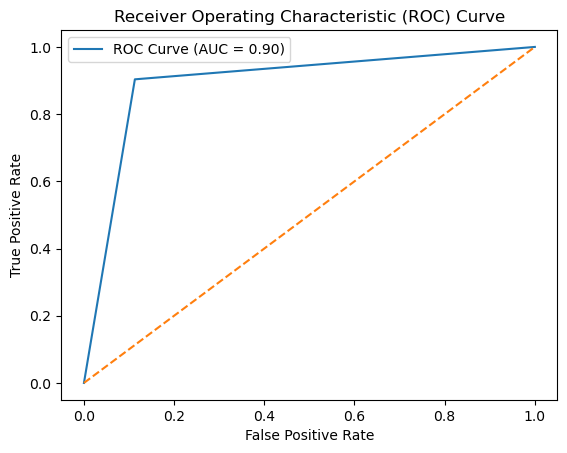

In [207]:

fpr, tpr, thresholds = roc_curve(y_test, svc_pred)

roc_auc_svc = roc_auc_score(y_test, svc_pred)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_svc))
plt.plot([0 , 1], [0 , 1], linestyle='--')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

### Percision Recall Curve

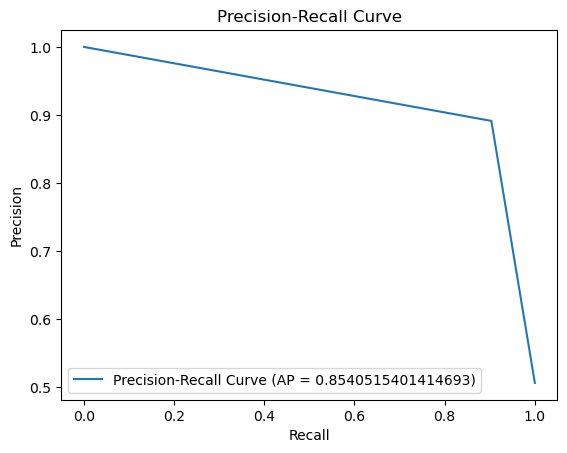

In [206]:
precision_svc, recall_svc, thresholds = precision_recall_curve(y_test, svc_pred)
avg = average_precision_score(y_test, svc_pred)
plt.plot(recall_svc, precision_svc, label='Precision-Recall Curve (AP = {})'.format(avg))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.show()

### Confusion Matrix 

In [27]:
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=pred)

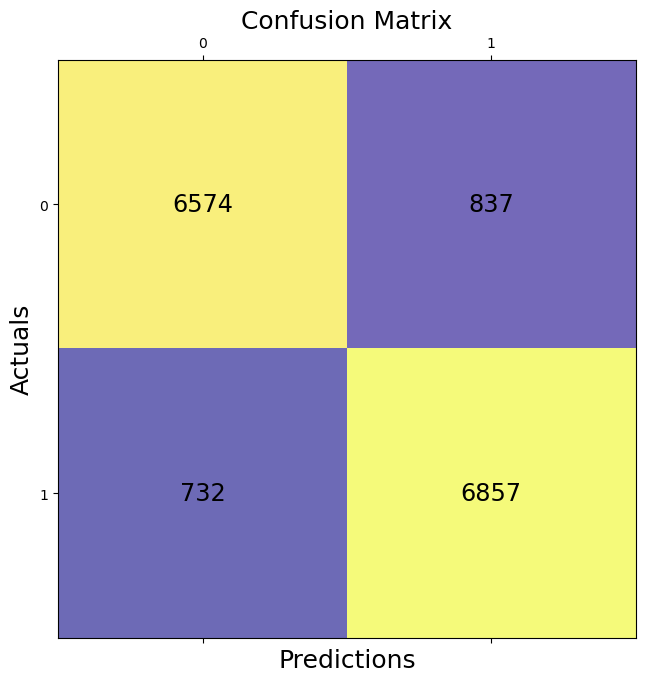

In [131]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap='plasma', alpha=0.6)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Visualize The count of Review

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

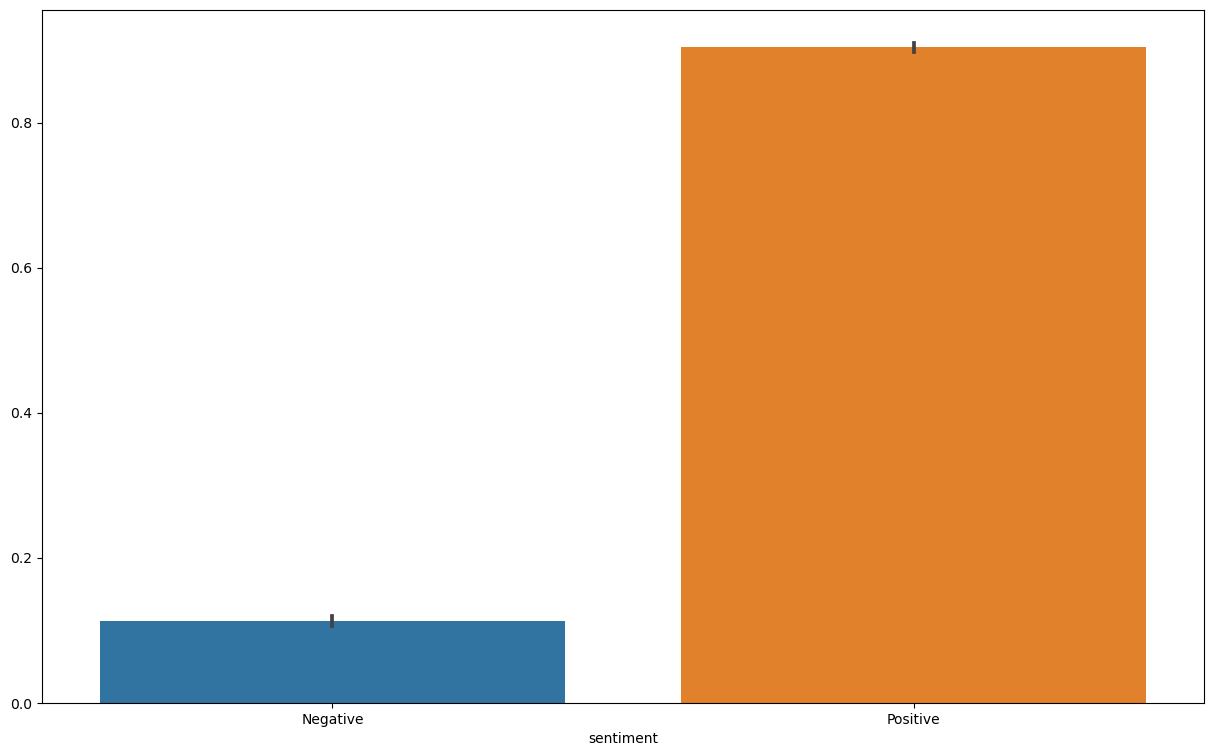

In [224]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(y_test,svc_pred)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])


#     Decision Tree..

In [107]:
dt= DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_tfidf,y_train)

text_clf2 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('dt', DecisionTreeClassifier()),])

text_clf2.fit(X_train, y_train)  
dt_pred =  text_clf2.predict(X_test)

In [108]:
print(metrics.confusion_matrix(y_test,dt_pred))

print(metrics.classification_report(y_test,dt_pred)) 

dt_sco = metrics.accuracy_score(y_test,dt_pred)

[[5395 2016]
 [2102 5487]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      7411
           1       0.73      0.72      0.73      7589

    accuracy                           0.73     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.73      0.73      0.73     15000



### ROC CURVE

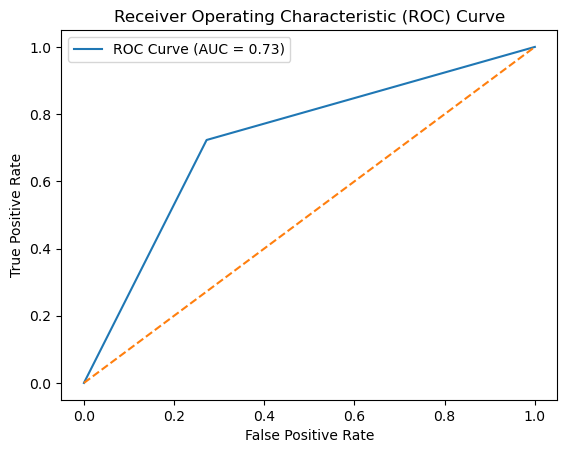

In [205]:

fpr, tpr, thresholds = roc_curve(y_test, dt_pred)

roc_auc_dt = roc_auc_score(y_test, dt_pred)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0 , 1], [0 , 1], linestyle='--')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

### Percision Recall Curve

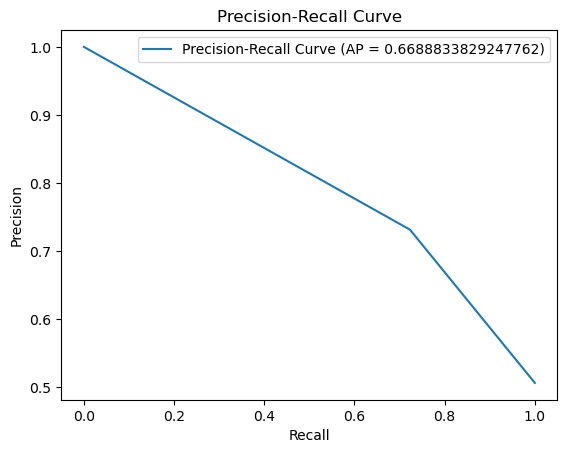

In [204]:
precision_dt, recall_dt, thresholds = precision_recall_curve(y_test, dt_pred)
avg = average_precision_score(y_test, dt_pred)
plt.plot(recall_dt, precision_dt, label='Precision-Recall Curve (AP = {})'.format(avg))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.show()

### Confusion Matrix

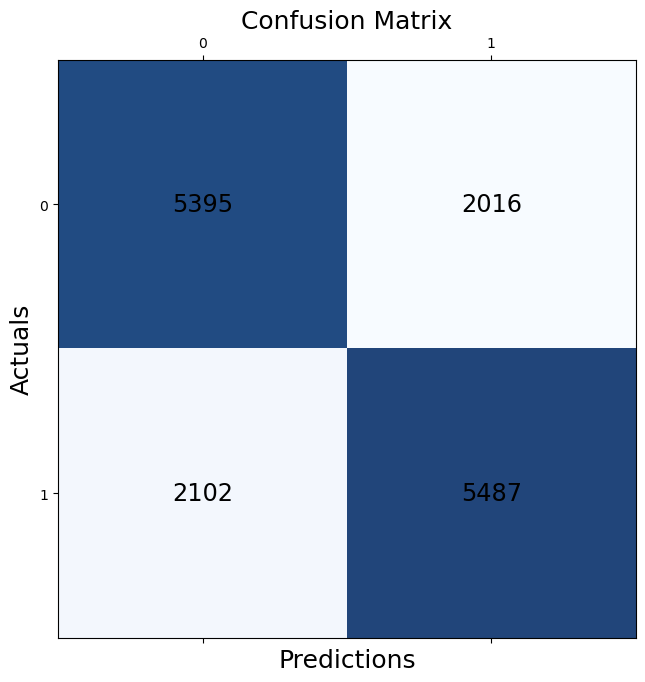

In [130]:
conf_matrix_dt=metrics.confusion_matrix(y_test,dt_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix_dt, cmap='Blues', alpha=0.9)
for i in range(conf_matrix_dt.shape[0]):
    for j in range(conf_matrix_dt.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_dt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Visualize The count of Review

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

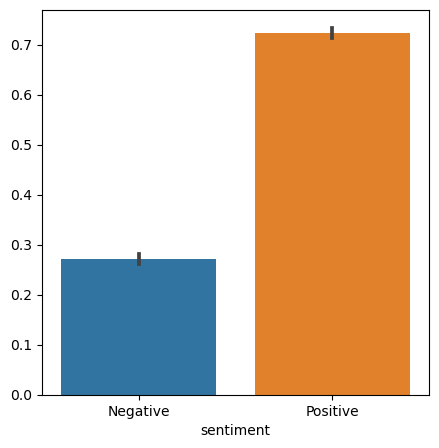

In [133]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(y_test,dt_pred)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])


# Ridge Classifier...

In [109]:
Ridge = RidgeClassifier(alpha=0.2)
Ridge.fit(X_train_tfidf,y_train)
text_clf3 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('Ridge', RidgeClassifier()),])


text_clf3.fit(X_train, y_train)  
rt_pred =  text_clf3.predict(X_test)

In [201]:
print(metrics.confusion_matrix(y_test,rt_pred))

print(metrics.classification_report(y_test,rt_pred)) 

rt_sco=metrics.accuracy_score(y_test,rt_pred)
rt_sco

[[6521  890]
 [ 699 6890]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7411
           1       0.89      0.91      0.90      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



0.8940666666666667

### ROC CURVE

C:\Users\waleed\AppData\Local\Temp\ipykernel_108372\2064775797.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['Negative', 'Positive'])
C:\Users\waleed\AppData\Local\Temp\ipykernel_108372\2064775797.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['Negative', 'Positive'])


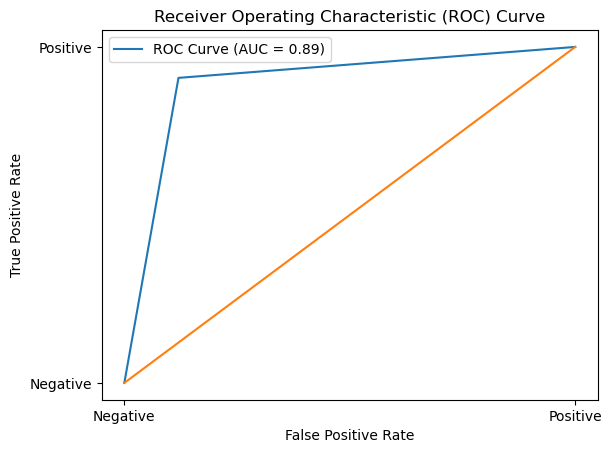

In [202]:

fpr, tpr, thresholds = roc_curve(y_test, rt_pred)

roc_auc_rt = roc_auc_score(y_test, rt_pred)
ax = plt.subplot()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_rt))
plt.plot(['negative' , 'positive'], ['negative' , 'positive'], linestyle='solid')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.legend()

plt.show()

### percision recall curve

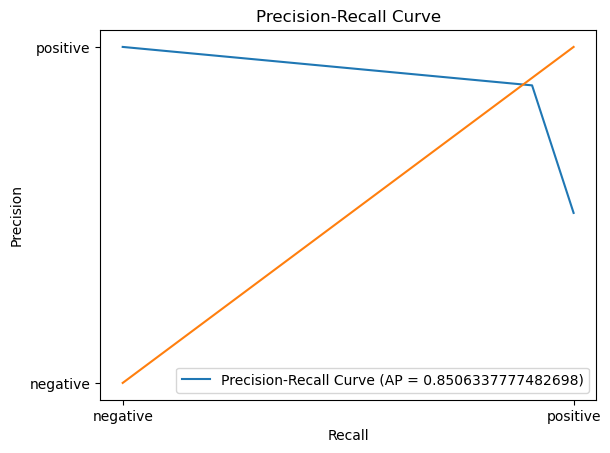

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [203]:
precision_rt, recall_rt, thresholds1 = precision_recall_curve(y_test, rt_pred)
avg1 = average_precision_score(y_test, rt_pred)
plt.plot(recall_rt, precision_rt, label='Precision-Recall Curve (AP = {})'.format(avg1))
plt.plot(['negative' , 'positive'], ['negative' , 'positive'], linestyle='solid')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.show()
rt_pred

### Confusion Matrix 

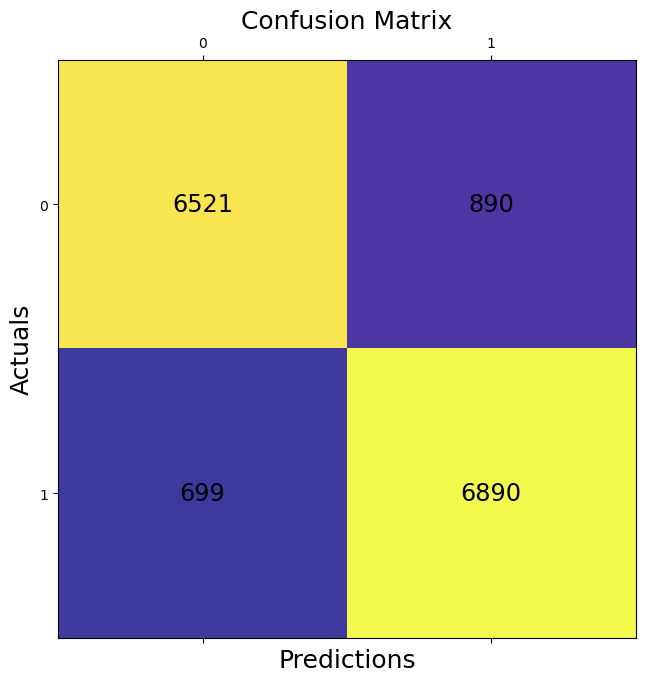

In [209]:
conf_matrix_rt=metrics.confusion_matrix(y_test,rt_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix_rt, cmap='plasma', alpha=0.8)
for i in range(conf_matrix_rt.shape[0]):
    for j in range(conf_matrix_rt.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_rt[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Visualize The count of Review

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

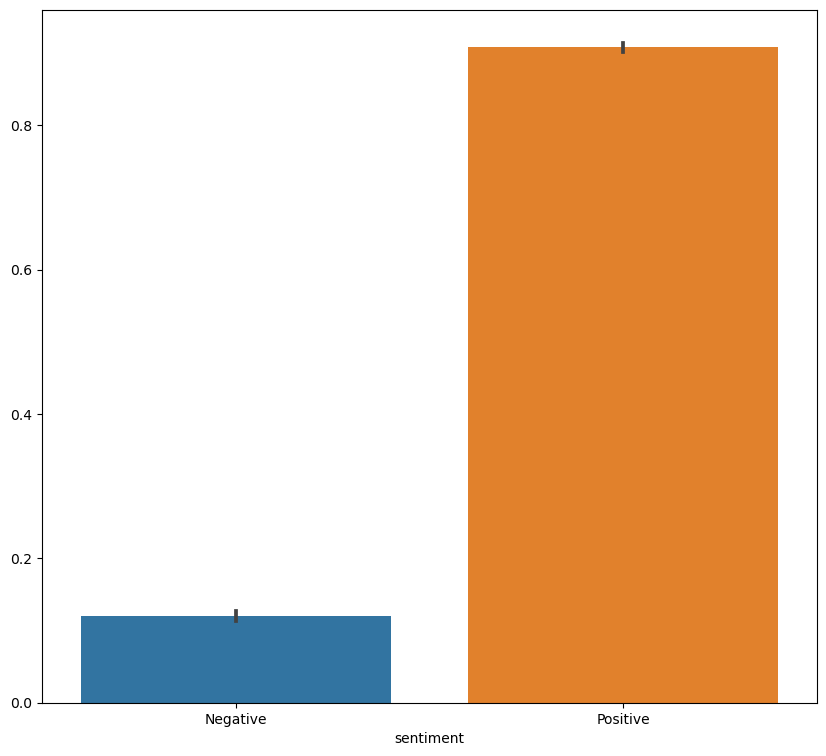

In [223]:
fig, ax = plt.subplots(figsize=(10
                                , 9))
sns.barplot(y_test,rt_pred)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])


# Gradiant Boosting

In [170]:
from sklearn import ensemble
grad = ensemble.GradientBoostingClassifier(n_estimators = 200, max_depth = 7, min_samples_split = 2,
          learning_rate = 0.1)
grad.fit(X_train_tfidf, y_train)

text_clf4 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('grad', ensemble.GradientBoostingClassifier()),])

text_clf4.fit(X_train, y_train)  
grad_pred =  text_clf4.predict(X_test)


### Confusion Matrix 

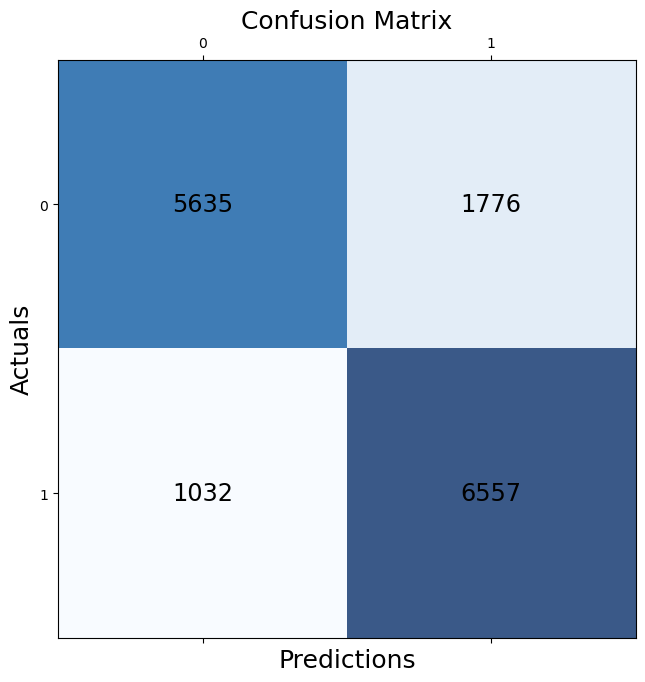

0.8128

In [208]:
grad_sco=metrics.accuracy_score(y_test,grad_pred)
conf_grad=metrics.confusion_matrix(y_test,grad_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_grad, cmap='Blues', alpha=0.8)
for i in range(conf_grad.shape[0]):
    for j in range(conf_grad.shape[1]):
        ax.text(x=j, y=i,s=conf_grad[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
grad_sco

### Percision Recall curve

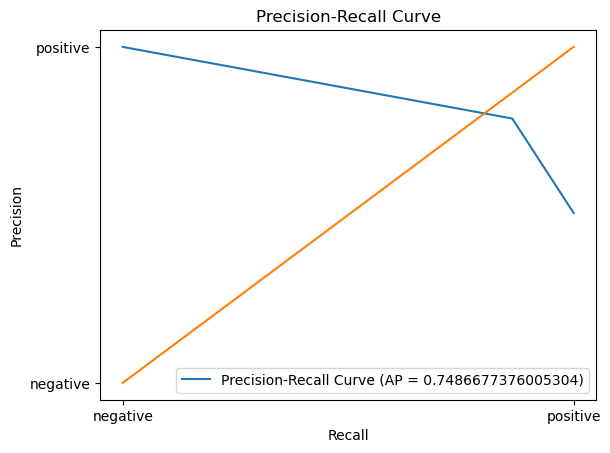

In [198]:
precision_grad, recall_grad, thresholds1 = precision_recall_curve(y_test, grad_pred)
avg1 = average_precision_score(y_test, grad_pred)
plt.plot(recall_grad, precision_grad, label='Precision-Recall Curve (AP = {})'.format(avg1))
plt.plot(['negative' , 'positive'], ['negative' , 'positive'], linestyle='solid')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.show()


### ROC Curve 

C:\Users\waleed\AppData\Local\Temp\ipykernel_108372\2022946482.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['Negative', 'Positive'])
C:\Users\waleed\AppData\Local\Temp\ipykernel_108372\2022946482.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['Negative', 'Positive'])


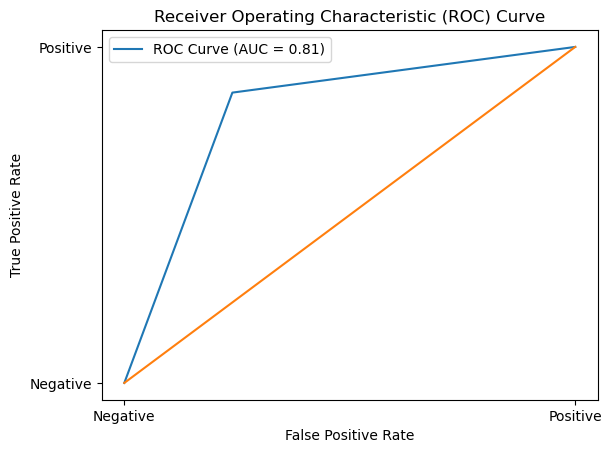

In [199]:

fpr, tpr, thresholds = roc_curve(y_test, grad_pred)

roc_auc_grad = roc_auc_score(y_test, grad_pred)
ax = plt.subplot()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_grad))
plt.plot(['negative' , 'positive'], ['negative' , 'positive'], linestyle='solid')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.legend()

plt.show()

### Visualize The count of Review

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

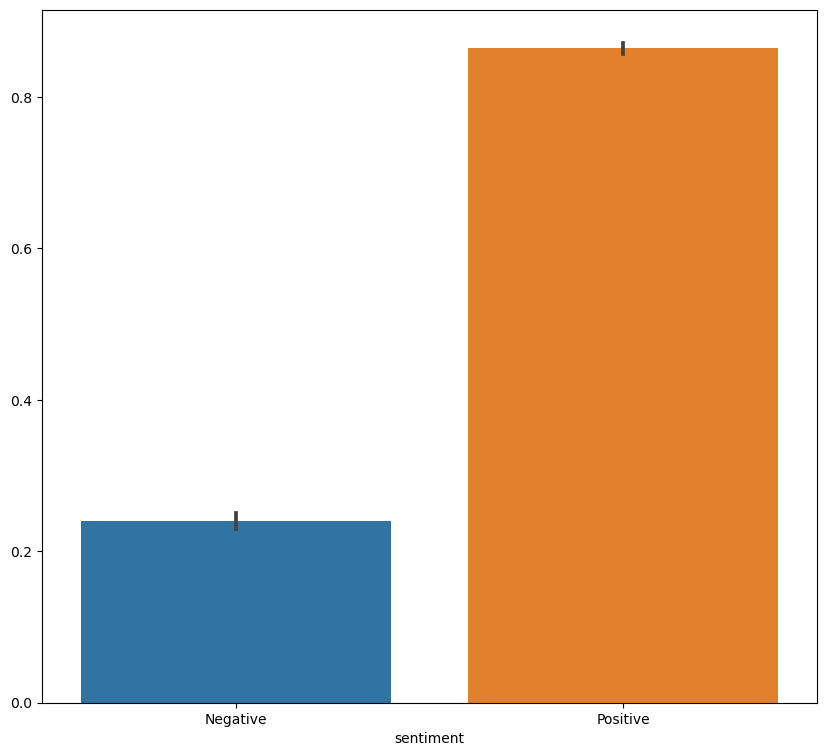

In [197]:
fig, ax = plt.subplots(figsize=(10
                                , 9))
sns.barplot(y_test,grad_pred)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])


# RandomForest 

In [177]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',max_depth=7)

rf.fit(X_train_tfidf, y_train)

text_clf5 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('rt', RandomForestClassifier()),])

text_clf5.fit(X_train, y_train)  
rf_pred =  text_clf5.predict(X_test)

In [176]:
rf_sco=metrics.accuracy_score(y_test,rf_pred)
rf_sco

0.8555333333333334

### confusion Matrix 

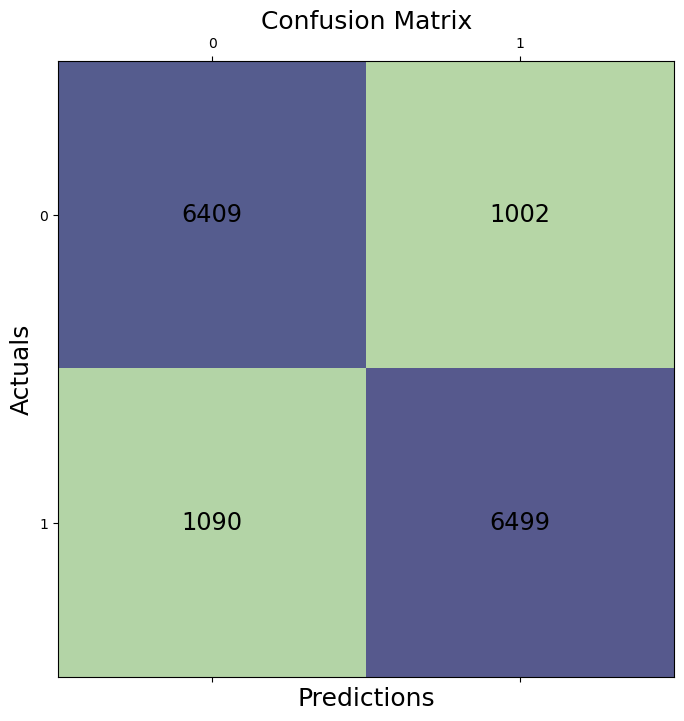

In [185]:
conf_rf=metrics.confusion_matrix(y_test,rf_pred)
fig, ax = plt.subplots(figsize=(20, 8
                                ))
ax.matshow(conf_rf, cmap='crest', alpha=0.8)
for i in range(conf_rf.shape[0]):
    for j in range(conf_rf.shape[1]):
        ax.text(x=j, y=i,s=conf_rf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


### Percision Recall curve

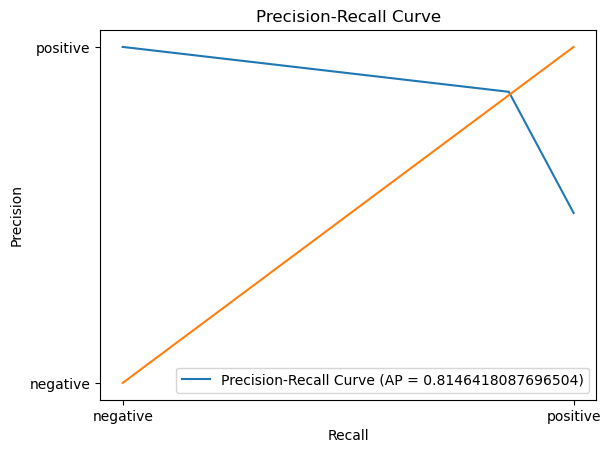

In [193]:
precision_rf, recall_rf, thresholds1 = precision_recall_curve(y_test, rf_pred)
avg1 = average_precision_score(y_test, rf_pred)
plt.plot(recall_rf, precision_rf, label='Precision-Recall Curve (AP = {})'.format(avg1))
plt.plot(['negative' , 'positive'], ['negative' , 'positive'], linestyle='solid')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.show()


### ROC CURVE

C:\Users\waleed\AppData\Local\Temp\ipykernel_108372\1984756530.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['Negative', 'Positive'])
C:\Users\waleed\AppData\Local\Temp\ipykernel_108372\1984756530.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['Negative', 'Positive'])


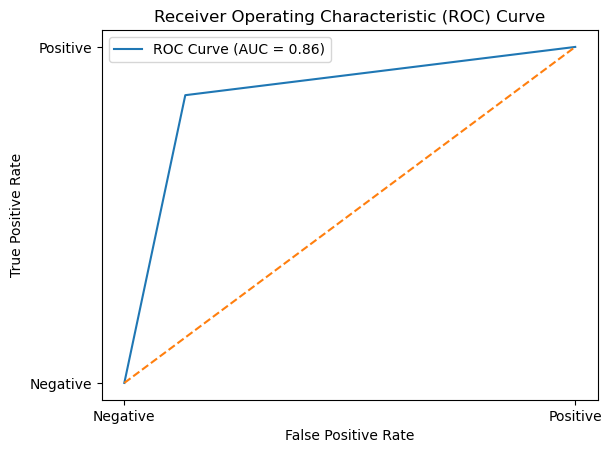

In [190]:

fpr, tpr, thresholds = roc_curve(y_test, rf_pred)

roc_auc_rf = roc_auc_score(y_test, rf_pred)
ax = plt.subplot()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(['negative' , 'positive'], ['negative' , 'positive'], linestyle='--')

# add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.legend()

plt.show()

### Visualize The count of Review

c:\Users\waleed\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

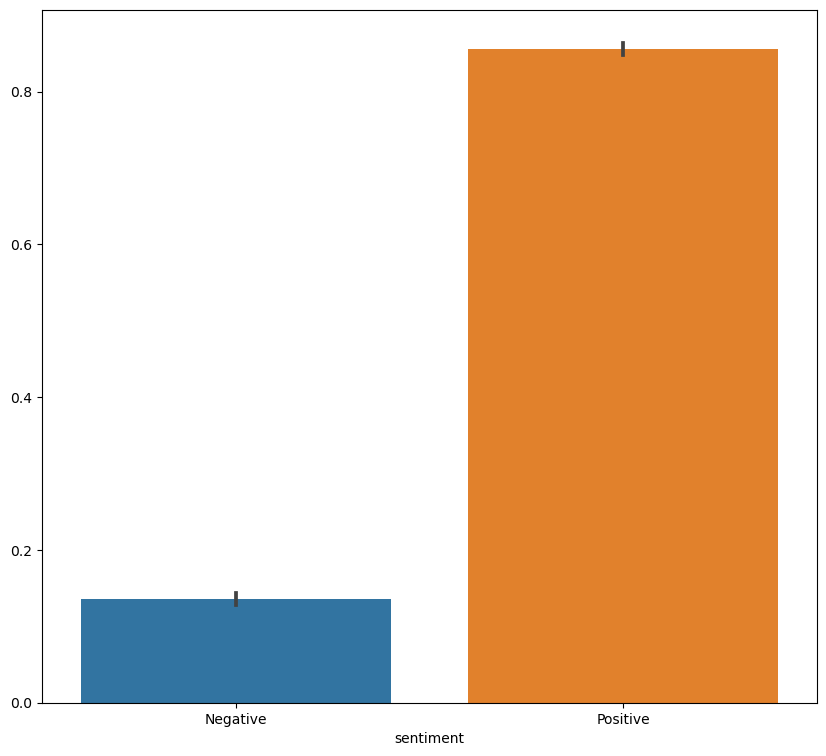

In [222]:
fig, ax = plt.subplots(figsize=(10
                                , 9))
sns.barplot(y_test,rf_pred)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])


# comparsion between Models Accuracy 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forrest'),
  Text(3, 0, 'Gradiant boosting'),
  Text(4, 0, 'Ridge')])

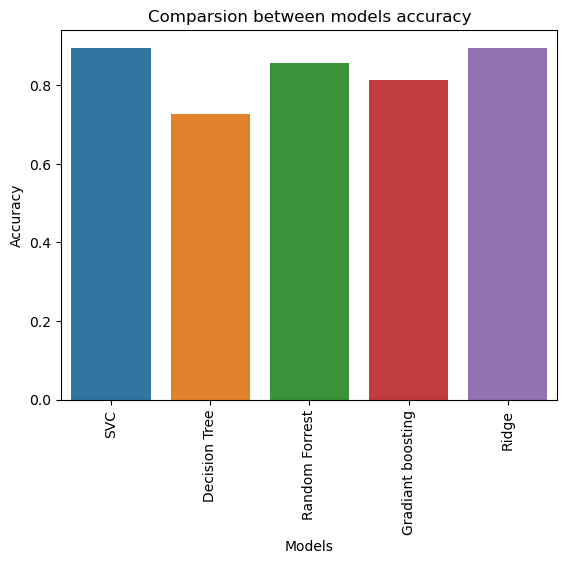

In [214]:
acc_compare={'Models':['SVC','Decision Tree','Random Forrest','Gradiant boosting','Ridge'],
                   'Acc': [svc_sco,dt_sco,rf_sco,grad_sco,rt_sco]}
sns.barplot(data=acc_compare,x='Models',y='Acc')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparsion between models accuracy')
plt.xticks(rotation=90)

In [220]:
from sklearn.metrics import precision_score,recall_score
precision_rt=precision_score(y_test,rt_pred)
precision_dt=precision_score(y_test,dt_pred)
precision_rf=precision_score(y_test,rf_pred)
precision_grad=precision_score(y_test,grad_pred)
precision_svc=precision_score(y_test,svc_pred)
recall_rt=recall_score(y_test,rt_pred)
recall_svc=recall_score(y_test,svc_pred)
recall_dt=recall_score(y_test,dt_pred)
recall_rf=recall_score(y_test,rf_pred)
recall_grad=recall_score(y_test,grad_pred)




# comparsion between Models Percision \
 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forrest'),
  Text(3, 0, 'Gradiant boosting'),
  Text(4, 0, 'Ridge')])

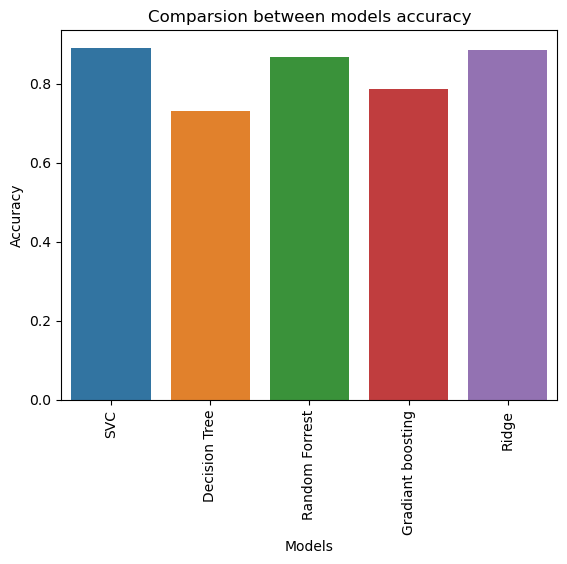

In [219]:
percision_compare={'Models':['SVC','Decision Tree','Random Forrest','Gradiant boosting','Ridge'],
                   'Acc': [precision_svc,precision_dt,precision_rf,precision_grad,precision_rt]}
sns.barplot(data=percision_compare,x='Models',y='Acc')
plt.xlabel('Models')
plt.ylabel('Percision')
plt.title('Comparsion between models Percision')
plt.xticks(rotation=90)

# comparsion between Models Recall 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forrest'),
  Text(3, 0, 'Gradiant boosting'),
  Text(4, 0, 'Ridge')])

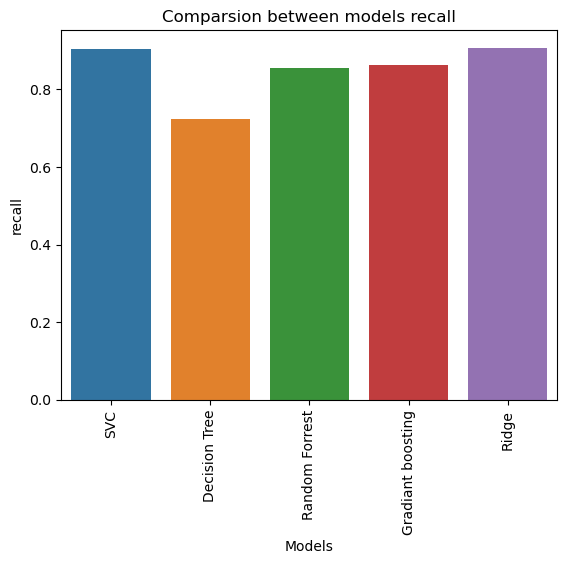

In [221]:
recall_compare={'Models':['SVC','Decision Tree','Random Forrest','Gradiant boosting','Ridge'],
                   'Acc': [recall_svc,recall_dt,recall_rf,recall_grad,recall_rt]}
sns.barplot(data=recall_compare,x='Models',y='Acc')
plt.xlabel('Models')
plt.ylabel('recall')
plt.title('Comparsion between models recall')
plt.xticks(rotation=90)